# Морфология 2
В данном ноутбуке находится задание на триграммы и словарь. В качестве текста будем использовать томик войны и мира: https://goo.gl/qcVTLE 

Для начала напомним некоторые полезные инструменты на питоне

## 1. Инструменты

### 1.1. Регулярные выражения
Исчерпывающий пост https://habr.com/ru/post/349860/

In [130]:
import re

# С помощью рег. выражения можно искать, заменять и сентезировать строки по шаблонам
# Парочка простых примеров
numbers = re.findall(r'\d+', r'There is some numbers: 49 and 432')
print(u'Находим числа в строке: ', numbers)

print(u'Простенький токенизатор: ', re.sub('[,\.?!]',' ','How, to? split. text!').split())

print(u'Еще один токенизатор: ', re.split(r'\W+', 'How, to? split. text! Again'))

# в качестве тренировки придумайте свой токенизатор в случае, когда из текста нужно получить только русские слова.

Находим числа в строке:  ['49', '432']
Простенький токенизатор:  ['How', 'to', 'split', 'text']
Еще один токенизатор:  ['How', 'to', 'split', 'text', 'Again']


### 1.2. Чтение файлов
Чтобы не мучится самим с кодировками, приведем способ чтения файла корпуса.

In [131]:
import io
import razdel
wordlist = None

with io.open('war_and_piece.txt', "r") as text_file:
    text = text_file.read()
    wordlist = razdel.tokenize(text.lower())
    # wordlist = Здесь заиспользуем токенизатор. Также приведем все слова к нижнему регистру.

### 1.3. ООП
В питоне можно создавать свои классы, скорее всего нам понадобится класс для хранения бора

In [132]:
class TrieNode():
    def __init__(self, char):
        self.char = char
        self.children = {}
        self.end = False

### 1.4. pyplot
Довольно часто приходится построить какие-нибудт графики и гистограммы для изучения данных, с которыми придется работать. Для этого в питоне есть удобнейший модуль для этого - pyplot. Туториал: https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

In [21]:
#!pip install matplotlib # Установка модуля
import matplotlib.pyplot as plt
# команда чтобы картинки рисовались прямо в ноутбуке
%matplotlib inline 

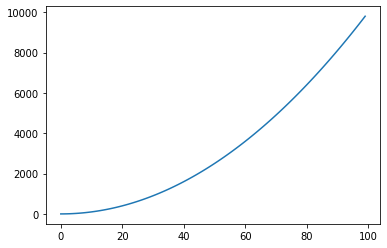

In [22]:
# Посмотрим на график функции x^2
data = [i * i for i in range(100)]
plt.plot(data)

(array([32., 13., 10.,  8.,  8.,  6.,  6.,  6.,  5.,  6.]),
 array([   0. ,  980.1, 1960.2, 2940.3, 3920.4, 4900.5, 5880.6, 6860.7,
        7840.8, 8820.9, 9801. ]),
 <a list of 10 Patch objects>)

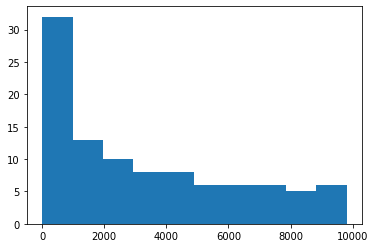

In [23]:
# и распределение по значениям
plt.hist(data)

Также полезная команда для подсчета времения выполнеия в ячейке

In [8]:
%%time
res = 0
for i in range(int(1e8)):
    res += 1

Wall time: 8.87 s


## 2. Задание
Собственно теперь нам потребуется написать подсчет триграмм и бор для словаря, чтобы реализовать простенькую систему исправления ошибок.

### 2.1. Триграммы
Для начала получим словарь триграмма - её кол-во в тексте, не забывая о начале и конце слова.

Далее можно построить гистограмму на кол-во вхождений триграмм, и посмотреть самые частые и какая частота у каких-нибудь заведомо странных, например: 'чгк', 'шкя' и подобные. Из полученных данных придумать эвристику, как считать слово с опечаткой. Проверить эвристику по словарю.

In [134]:
import io
import razdel
from collections import Counter
import numpy as np
wordlist = None

with io.open('war_and_piece.txt', "r") as text_file:
    text = text_file.read()
    wordlist = list(razdel.tokenize(text.lower()))

In [135]:
def build_corpus_trigrams(word_list, n_gramm=3):
    n_grams = []
    for word in word_list:
        if type(word) != str:
            word = word.text
        marker_word = '*' + word + '*'
        for i in range(len(marker_word) - n_gramm + 1):
            n_grams.append(marker_word[i:i + n_gramm])
            
    n_gram_dict = Counter(n_grams)
    
    return dict(n_gram_dict)

        
def is_error(word, trigrams, print_error=False):
    if type(word) != str:
        word = word.text
    marker_word = '*' + word + '*' 
    
    errors = []
    for char in range(1, len(marker_word) - 2):
        trigram = marker_word[char - 1: char + 2]
        count = 0
        
        if trigram in trigrams and trigrams[trigram] > 2:
            count += 0
        else:
            count += 1
        
        if count == 1: 
            errors.append(trigram)
            
    if errors:
        if print_error:
            return set(errors)
        return True
    else:
        return False

In [136]:
trigrams = build_corpus_trigrams(wordlist)

In [137]:
build_corpus_trigrams(['привет'])

{'*пр': 1, 'при': 1, 'рив': 1, 'иве': 1, 'вет': 1, 'ет*': 1}

In [138]:
is_error('смотрэт', trigrams, True)

{'рэт', 'трэ'}

In [139]:
for word in wordlist:
    error = is_error(word, trigrams, True)
    if error:
        print(f'Cлово: {word.text}, предпологаемые ошибки ->', error)

Cлово: lucques, предпологаемые ошибки -> {'luc', 'ucq'}
Cлово: pallier, предпологаемые ошибки -> {'pal'}
Cлово: atrocites, предпологаемые ошибки -> {'roc', 'oci'}
Cлово: antichrist, предпологаемые ошибки -> {'hri'}
Cлово: генуа, предпологаемые ошибки -> {'нуа'}
Cлово: лукка, предпологаемые ошибки -> {'кка', 'укк'}
Cлово: антихриста, предпологаемые ошибки -> {'ихр'}
Cлово: антихрист, предпологаемые ошибки -> {'ихр'}
Cлово: июле, предпологаемые ошибки -> {'*ию', 'юле', 'июл'}
Cлово: perspective, предпологаемые ошибки -> {'rsp', 'tiv'}
Cлово: malade, предпологаемые ошибки -> {'lad'}
Cлово: семью, предпологаемые ошибки -> {'мью'}
Cлово: virulente, предпологаемые ошибки -> {'vir', 'iru'}
Cлово: смутясь, предпологаемые ошибки -> {'утя'}
Cлово: деды, предпологаемые ошибки -> {'дед'}
Cлово: fetes, предпологаемые ошибки -> {'fet'}
Cлово: insipides, предпологаемые ошибки -> {'sip', 'ipi'}
Cлово: tourmentez, предпологаемые ошибки -> {'urm'}
Cлово: a-t-on, предпологаемые ошибки -> {'t-o', '-on'}
C

Cлово: увлажая, предпологаемые ошибки -> {'увл'}
Cлово: reconduirai, предпологаемые ошибки -> {'uir'}
Cлово: облегчает, предпологаемые ошибки -> {'гча'}
Cлово: soutndra, предпологаемые ошибки -> {'tnd', 'utn'}
Cлово: immense, предпологаемые ошибки -> {'imm'}
Cлово: testament, предпологаемые ошибки -> {'tam'}
Cлово: oncle, предпологаемые ошибки -> {'ncl'}
Cлово: avant-hier, предпологаемые ошибки -> {'-hi', 't-h'}
Cлово: назидателен, предпологаемые ошибки -> {'зид'}
Cлово: digne, предпологаемые ошибки -> {'dig'}
Cлово: prusse, предпологаемые ошибки -> {'pru'}
Cлово: компаньонкой, предпологаемые ошибки -> {'ньо'}
Cлово: мадмуазель, предпологаемые ошибки -> {'дму', 'уаз', 'адм'}
Cлово: источника, предпологаемые ошибки -> {'чни'}
Cлово: людских, предпологаемые ошибки -> {'юдс'}
Cлово: суеверие, предпологаемые ошибки -> {'уев'}
Cлово: алгебры, предпологаемые ошибки -> {'лге', 'алг', 'геб'}
Cлово: благополучно, предпологаемые ошибки -> {'гоп'}
Cлово: старик-слуга, предпологаемые ошибки -> {'к

Cлово: позавчера, предпологаемые ошибки -> {'авч'}
Cлово: поправляйтесь, предпологаемые ошибки -> {'ляй'}
Cлово: ямщику, предпологаемые ошибки -> {'мщи', '*ям', 'ямщ'}
Cлово: шумящими, предпологаемые ошибки -> {'мящ'}
Cлово: дворцу, предпологаемые ошибки -> {'рцу'}
Cлово: euer, предпологаемые ошибки -> {'eue'}
Cлово: hochgeboren, предпологаемые ошибки -> {'geb', 'chg', 'hge'}
Cлово: наклонясь, предпологаемые ошибки -> {'няс'}
Cлово: нюхая, предпологаемые ошибки -> {'*ню'}
Cлово: краями, предпологаемые ошибки -> {'аям'}
Cлово: генерала-фельдмаршала, предпологаемые ошибки -> {'ла-', '-фе', 'а-ф', 'ьдм'}
Cлово: отдохните, предпологаемые ошибки -> {'хни'}
Cлово: спальню, предпологаемые ошибки -> {'ьню'}
Cлово: сижу, предпологаемые ошибки -> {'сиж'}
Cлово: копенгагене, предпологаемые ошибки -> {'гаг'}
Cлово: циркуляр, предпологаемые ошибки -> {'ирк', 'цир', '*ци'}
Cлово: bilibine, предпологаемые ошибки -> {'lib', 'ibi'}
Cлово: colportaient, предпологаемые ошибки -> {'olp', 'lpo'}
Cлово: отз

Cлово: viasmitinoff, предпологаемые ошибки -> {'smi', 'via', 'ino'}
Cлово: стыдливости, предпологаемые ошибки -> {'ыдл'}
Cлово: аппетитно, предпологаемые ошибки -> {'апп', 'итн'}
Cлово: рейнвейн, предпологаемые ошибки -> {'йнв'}
Cлово: viasmitinoff, предпологаемые ошибки -> {'smi', 'via', 'ino'}
Cлово: зятем, предпологаемые ошибки -> {'*зя'}
Cлово: вызывающе-счастливой, предпологаемые ошибки -> {'е-с', '-сч', 'ще-'}
Cлово: неинтересны, предпологаемые ошибки -> {'еин'}
Cлово: выпрямляет, предпологаемые ошибки -> {'ямл'}
Cлово: эка, предпологаемые ошибки -> {'эка'}
Cлово: 50, предпологаемые ошибки -> {'*50'}
Cлово: чье-то, предпологаемые ошибки -> {'ье-'}
Cлово: чужое, предпологаемые ошибки -> {'жое'}
Cлово: кое-кто, предпологаемые ошибки -> {'-кт'}
Cлово: усвоивается, предпологаемые ошибки -> {'усв'}
Cлово: верхнюю, предпологаемые ошибки -> {'хню'}
Cлово: пробурлил, предпологаемые ошибки -> {'урл'}
Cлово: brillant, предпологаемые ошибки -> {'ril', 'bri'}
Cлово: пахучим, предпологаемые о

Cлово: дивизией, предпологаемые ошибки -> {'зие'}
Cлово: сломлю, предпологаемые ошибки -> {'омл'}
Cлово: холмы, предпологаемые ошибки -> {'лмы', 'олм'}
Cлово: дефилею, предпологаемые ошибки -> {'деф', 'ефи'}
Cлово: слушаю-с, предпологаемые ошибки -> {'ю-с', 'аю-'}
Cлово: troisieme, предпологаемые ошибки -> {'iem'}
Cлово: dites-lui, предпологаемые ошибки -> {'-lu', 's-l'}
Cлово: demandez-lui, предпологаемые ошибки -> {'z-l', '-lu'}
Cлово: tirailleurs, предпологаемые ошибки -> {'*ti'}
Cлово: австрийцу, предпологаемые ошибки -> {'йцу'}
Cлово: пустынной, предпологаемые ошибки -> {'ынн'}
Cлово: зевал, предпологаемые ошибки -> {'зев'}
Cлово: зевоту, предпологаемые ошибки -> {'зев'}
Cлово: разноцветных, предпологаемые ошибки -> {'ноц', 'оцв'}
Cлово: аффектацией, предпологаемые ошибки -> {'фек', 'афф'}
Cлово: аффектацией, предпологаемые ошибки -> {'фек', 'афф'}
Cлово: салютовал, предпологаемые ошибки -> {'юто'}
Cлово: худее, предпологаемые ошибки -> {'дее'}
Cлово: отдохновенно, предпологаемые 

In [140]:
value = [x for x in trigrams.values()]
threshold = np.quantile(value, 0.95)

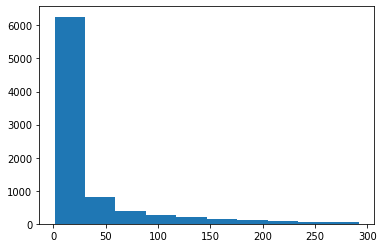

In [141]:
plt.hist([x for x in trigrams.values() if x < threshold]);

### 2.2. Бор
Далее построим бор, с помощью которого будем искать исправления опечатки в слове. Пока только в случае замены и удаления в конце (Если есть желание, то можно и для всех случаев). Также сравнить по времени с поиском в случае замены в исходном слове последних двух символов и поиске в словаре.

In [145]:
from nltk.metrics import edit_distance

In [147]:
edit_distance('привет', 'превет')

1

In [162]:
def correct_word(word):
    return trie.get_words(word)
    
def correct_word_naive(word_to_correct, wordlist):
    dist = [(word.text, edit_distance(word_to_correct.lower(), word.text)) for word in wordlist]
    min_distance = sorted(dist, key=lambda x: x[1])[0][1]

    result = set([word[0] for word in dist if word[1] == min_distance])
    
    print(f'Схожие слова со словом {word_to_correct}: {result}')

In [163]:
correct_word_naive('пака', wordlist)

Схожие слова со словом пака: {'парка', 'паха', 'папа', 'пока', 'мака'}


In [21]:
sample = '''лев николаевич талстой война и мип том чусть пегвая е паместья мой верный рап ну что князь генуа и лука стали не
бальше как паместьяни фамили бонапарте нет я вас предупреждааю если вы мне ни скажете что у нас вайна если вы еще позволете 
себе зашишать все гадасты все ужаси этого антихриста права я верю что он антехрест я вас больше не знаю вы уж не друх мой вы 
уш не мой верный раб как вы говориде ну здравствуйде здравствуйте я вижу что я вас пугаю садитесь и расказывайте так гаворила
в июле года известная анна павловна шерер фрейлина и'''

### 2.3 Все вместе
Теперь соберем поиск и исправление опечаток в одну систему, которая будет принимать текст и править его. Также замерим скорость по сравнению с "менее наивным подходом".

In [ ]:
def correct_mistakes(text):
    '''returns corrected text'''
    pass

def correct_mistakes_naive(text):
    '''returns corrected text using generation'''
    pass